<a href="https://colab.research.google.com/github/Mabinogit/AI-Image-Classification/blob/main/Agent_classification_in_enviroment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Can an llm simulated agent classify cat images in simulated enviroment with the accuracy comparable to human performance

Build the envirmonent for the agent

In [ ]:
!pip install pybullet

In [ ]:
import pybullet as p
import pybullet_data
import numpy as np
from IPython.display import display, Image
import cv2

# connect to pybullet
physicsClient = p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath())


In [ ]:
# Load plane and agent

import os

plane_path = os.path.join(pybullet_data.getDataPath(), "plane.urdf")
plane = p.loadURDF(plane_path)
cube_start_pos = [0,0,0.5]
cube_start_orientation = p.getQuaternionFromEuler([0,0,0])


cube_path = os.path.join(pybullet_data.getDataPath(), "cube.urdf")
agent = p.loadURDF(cube_path, cube_start_pos, cube_start_orientation) # Changed r2d2.urdf to cube_path

# Camera setup
camera_pos = [1, 1, 1]
target_pos = [0, 0, 0]
up_vector = [0, 0, 1]

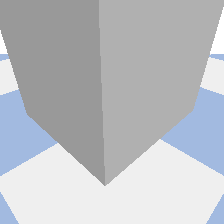

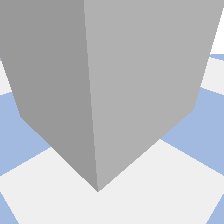

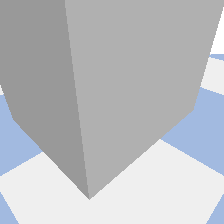

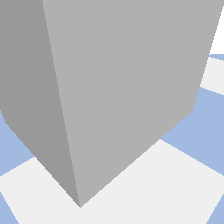

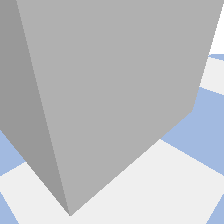

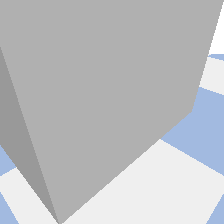

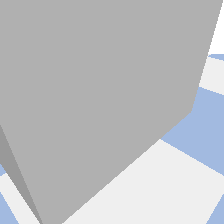

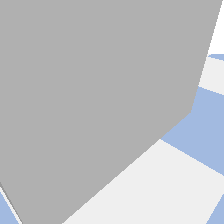

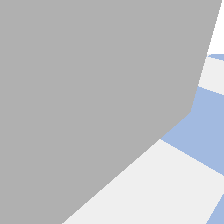

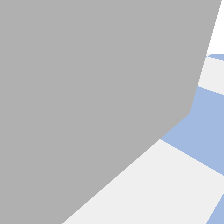

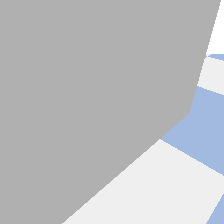

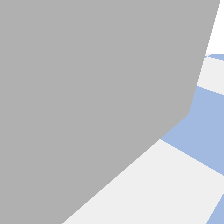

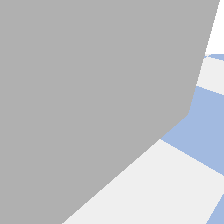

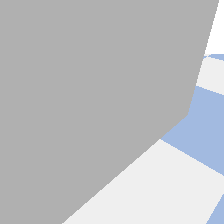

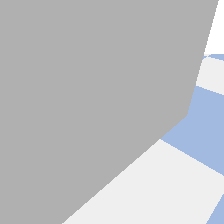

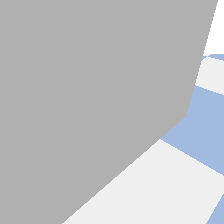

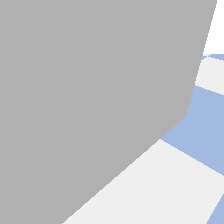

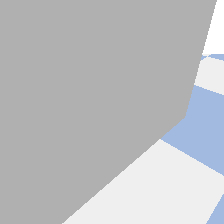

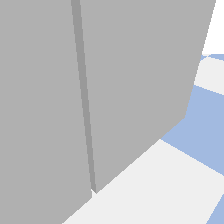

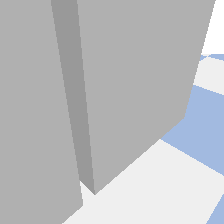

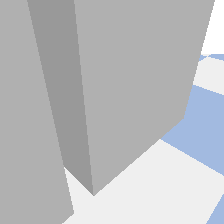

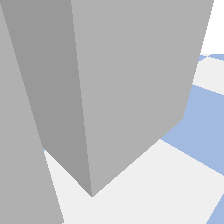

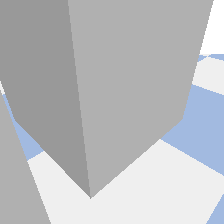

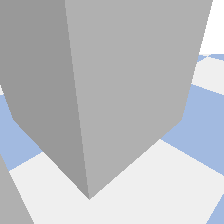

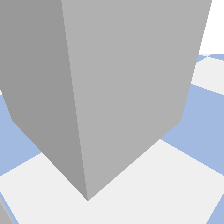

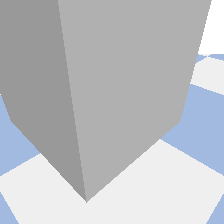

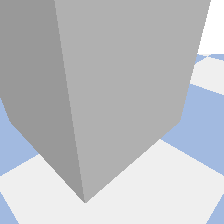

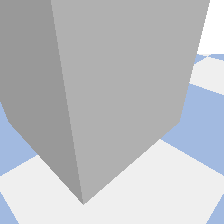

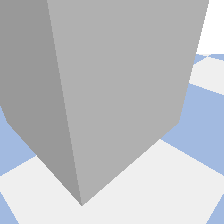

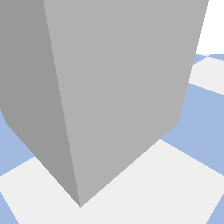

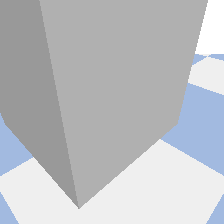

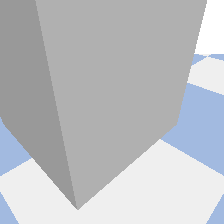

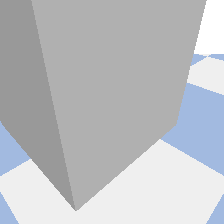

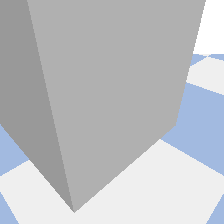

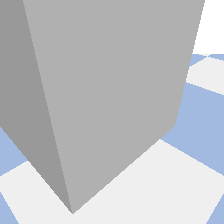

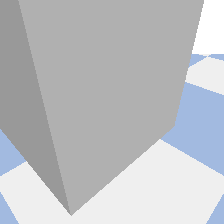

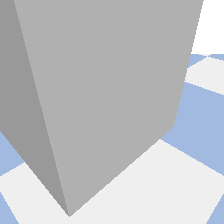

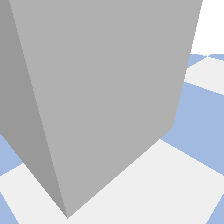

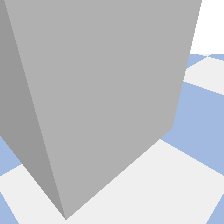

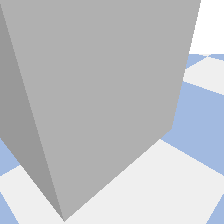

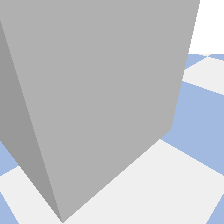

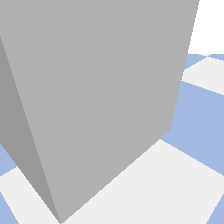

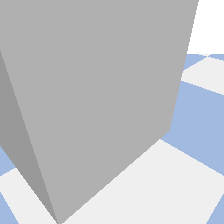

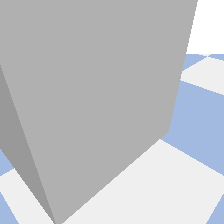

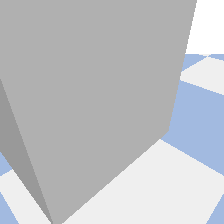

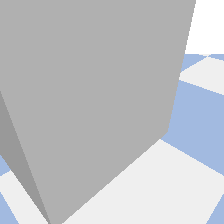

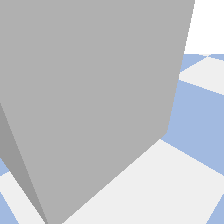

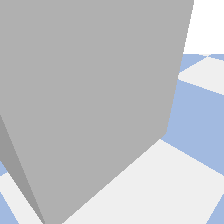

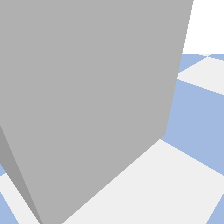

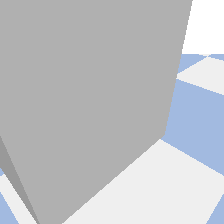

In [ ]:
# Simple enviromental loop
for step in range(50):
    p.stepSimulation()

    # Move agent forward a bit
    pos, ori = p.getBasePositionAndOrientation(agent)
    new_pos = [pos[0]+0.01, pos[1], pos[2]]
    p.resetBasePositionAndOrientation(agent, new_pos, ori)

    # Render camera image
    view_matrix = p.computeViewMatrix(camera_pos, target_pos, up_vector)
    proj_matrix = p.computeProjectionMatrixFOV(fov=60, aspect=1.0, nearVal=0.1, farVal=3.0)
    width, height, rgb, depth, seg = p.getCameraImage(224, 224, view_matrix, proj_matrix)

    # Convert image to displayable format
    rgb = np.reshape(rgb, (height, width, 4))[:,:,:3]  # remove alpha channel
    rgb = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
    cv2.imwrite("frame.png", rgb)
    display(Image("frame.png"))




Build the agent and place it into the enviroment